In [5]:
#Author: Aditya Kharmale 
import numpy as np  
import pandas as pd  

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df_train = pd.read_csv('train.csv')
 
df_test = pd.read_csv('test.csv')

In [8]:
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [9]:
df_test

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [12]:
df_train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_test.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,12814.000000,12814.000000,12814.000000,1.281400e+04,1.281400e+04,12814.000000,12814.000000,12814.000000,1.281400e+04,12814.000000,...,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000
mean,25625.500000,709.331356,753.274934,1.846533e+06,1.842029e+06,1672.908225,96.459497,64.730607,1.926893e+05,84.548072,...,0.030695,0.618650,0.833823,0.584985,2.472743,1.311689,1.388119,0.101164,-0.139516,0.572401
std,3699.227509,531.878508,500.743570,1.916427e+06,1.911426e+06,3725.518996,219.928548,188.506385,4.812871e+05,28.711574,...,0.048663,0.220361,0.220306,0.483308,0.761108,0.467621,0.401725,0.488127,0.117878,0.331974
min,19219.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,5.350000e+02,0.000000,...,0.001500,0.014400,0.066700,0.000000,0.778200,0.344400,0.301000,-0.991000,-0.998900,0.119000
25%,22422.250000,46.000000,214.000000,6.401738e+05,6.398570e+05,91.000000,15.000000,14.000000,9.968000e+03,68.000000,...,0.006600,0.455075,0.666700,0.000000,1.959000,1.000000,1.079200,-0.277800,-0.192600,0.257000
50%,25625.500000,776.000000,796.000000,1.378890e+06,1.378588e+06,169.000000,24.000000,24.000000,1.840200e+04,90.000000,...,0.009500,0.638700,0.967700,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143900,0.472900
75%,28828.750000,1152.000000,1167.000000,2.368032e+06,2.356238e+06,649.000000,64.000000,60.000000,6.696025e+04,105.000000,...,0.019075,0.785700,1.000000,1.000000,2.814125,1.431400,1.707600,0.529400,-0.084300,0.999200
max,32032.000000,1688.000000,1712.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,...,0.747200,1.000000,1.000000,1.000000,4.680200,2.938500,4.258700,0.973900,0.591700,1.000000


In [14]:
corr_train = df_train.corr()

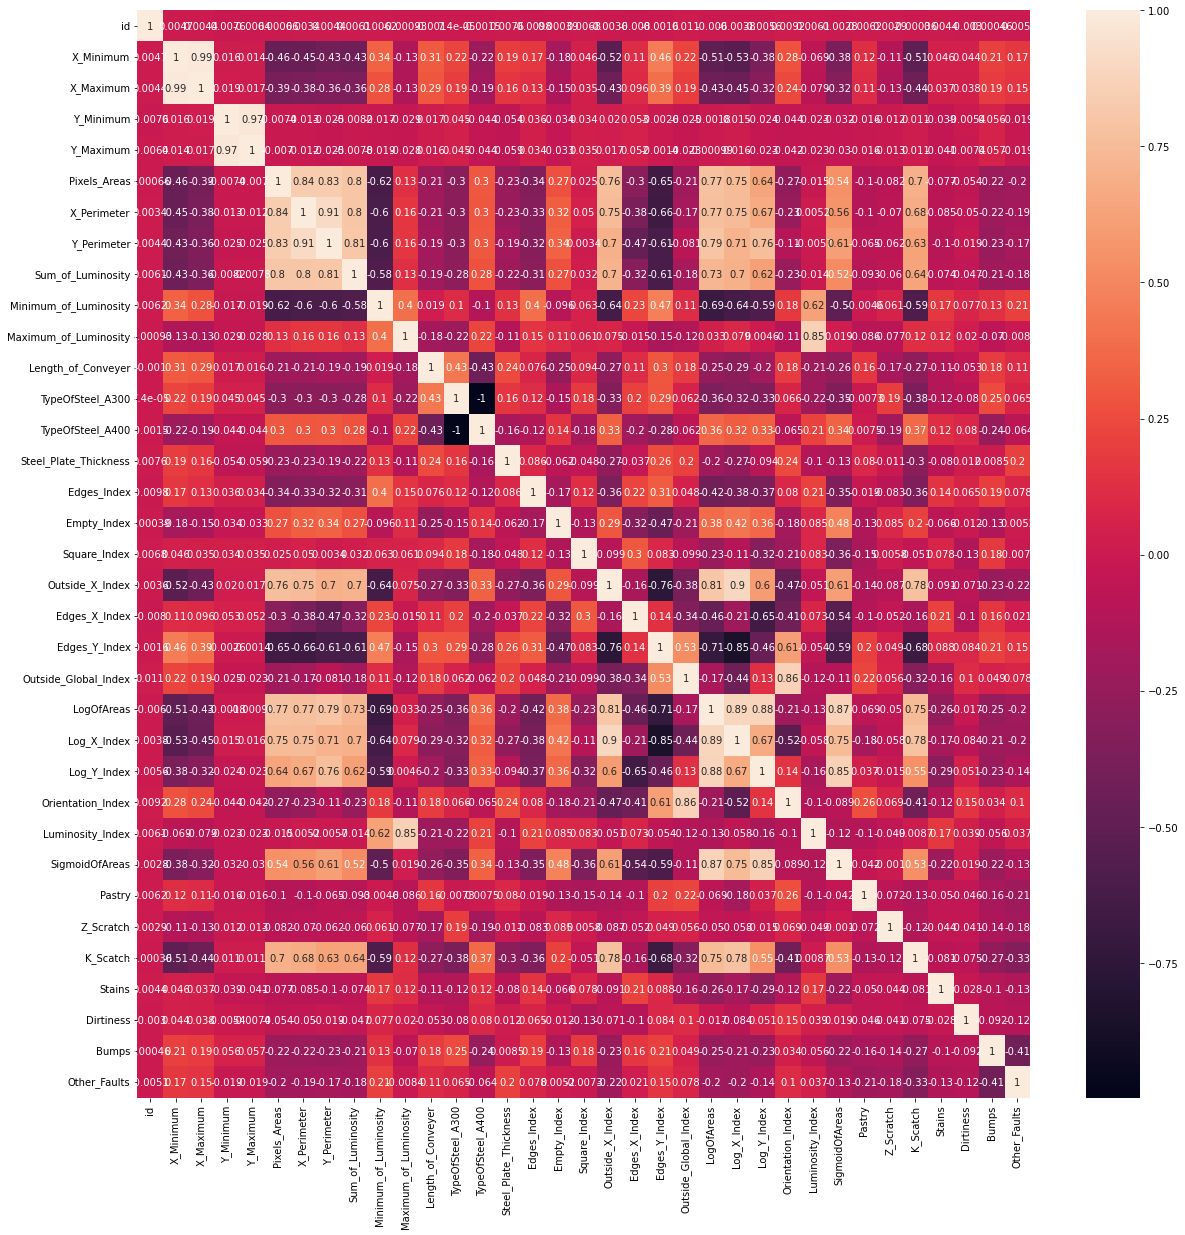

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_train,annot=True)
plt.show()

In [16]:
# Correlation of each type of fautl with other column
# correlation = [-1, 1]
target_columns = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
for t_col in target_columns:
    print(f'Column:{t_col}')
    print(pd.Series(corr_train[t_col]).sort_values(ascending=False))

Column:Pastry
Pastry                   1.000000
Orientation_Index        0.261302
Outside_Global_Index     0.223768
Edges_Y_Index            0.201774
Length_of_Conveyer       0.158670
X_Minimum                0.119306
X_Maximum                0.108808
Steel_Plate_Thickness    0.080037
Log_Y_Index              0.036549
TypeOfSteel_A400         0.007499
id                       0.006174
Minimum_of_Luminosity   -0.004622
TypeOfSteel_A300        -0.007322
Y_Minimum               -0.015512
Y_Maximum               -0.016287
Edges_Index             -0.019327
SigmoidOfAreas          -0.042299
Dirtiness               -0.046237
Stains                  -0.050148
Y_Perimeter             -0.064965
LogOfAreas              -0.068590
Z_Scratch               -0.072496
Maximum_of_Luminosity   -0.086090
Sum_of_Luminosity       -0.093160
Pixels_Areas            -0.101295
Edges_X_Index           -0.101720
Luminosity_Index        -0.103424
X_Perimeter             -0.104322
K_Scatch                -0.133473


In [17]:
target_counts = []
for t_col in target_columns:
    print(f'Column:{t_col}')
    value_counts_col = df_train[t_col].value_counts()
    defect = value_counts_col.iloc[1]
    print(f'Number of defects in {t_col} category:{defect}')
    target_counts.append(defect)

Column:Pastry
Number of defects in Pastry category:1466
Column:Z_Scratch
Number of defects in Z_Scratch category:1150
Column:K_Scatch
Number of defects in K_Scatch category:3432
Column:Stains
Number of defects in Stains category:568
Column:Dirtiness
Number of defects in Dirtiness category:485
Column:Bumps
Number of defects in Bumps category:4763
Column:Other_Faults
Number of defects in Other_Faults category:6558


In [18]:
# target_columns = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
df_train[target_columns].sum(axis=1).value_counts()

1    18380
0      818
2       21
dtype: int64

In [19]:
# 1--> having only one type of fault ~ 95.63452883% 
# 2--> having 2 fault at a time ~ 0.1092668713%
# 0--> No fault ~ 4.256204797%

In [20]:
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [21]:
val_counts = df_train[target_columns].sum(axis=1).values
df_train['Total_defects'] = val_counts

df_train[df_train.Total_defects == 2]

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Total_defects
634,634,41,192,1682722,1682891,9927,578,343,1098162,29,...,-0.1071,1.0000,0,0,1,0,0,0,1,2
752,752,39,194,2134009,2134076,10904,562,360,1130960,32,...,-0.1031,0.4630,0,0,1,0,0,0,1,2
3572,3572,241,360,938265,938349,2027,178,118,241083,38,...,-0.3705,1.0000,0,0,1,0,0,1,0,2
4416,4416,39,729,498078,498335,13114,976,453,1438454,29,...,-0.0960,1.0000,0,0,1,0,0,0,1,2
4530,4530,39,222,221142,2212144,10166,634,383,1130960,31,...,-0.2199,1.0000,0,0,1,0,0,0,1,2
4664,4664,39,218,7430,7458,21321,758,441,2256472,22,...,-0.0573,1.0000,0,0,1,0,0,0,1,2
6448,6448,41,192,92878,92896,11211,572,357,1402972,31,...,-0.0948,1.0000,0,0,1,0,0,0,1,2
7589,7589,41,776,844714,844903,11711,822,497,1351903,25,...,-0.0971,1.0000,0,0,1,0,0,0,1,2
8075,8075,41,193,1725027,1725163,10941,639,409,1270726,40,...,-0.1077,1.0000,0,0,1,0,0,0,1,2
8538,8538,39,215,1512277,1512467,13033,709,424,1508093,26,...,-0.0966,1.0000,0,0,1,0,0,0,1,2


In [22]:
# So our metal with 2 defect < 0.2% so we are removing it, we don't want outliers

multiple_defects = list(df_train[df_train.Total_defects == 2].index)

for index in multiple_defects:
    df_train.at[index,'Pastry'] = 0
    df_train.at[index,'Bumps'] = 0
    df_train.at[index,'Other_Faults'] = 0

In [23]:
multiple_defects

[634,
 752,
 3572,
 4416,
 4530,
 4664,
 6448,
 7589,
 8075,
 8538,
 9103,
 9388,
 10225,
 10315,
 13318,
 13990,
 15992,
 16307,
 17503,
 17815,
 17870]

In [24]:
df_train[target_columns].sum(axis=1).value_counts()

1    18401
0      818
dtype: int64

In [25]:
target_counts = []
for t_col in target_columns:
    print(f'Column:{t_col}')
    value_counts_col = df_train[t_col].value_counts()
    defect = value_counts_col.iloc[1]
    print(f'Number of defects in {t_col} category:{defect}')
    target_counts.append(defect)

Column:Pastry
Number of defects in Pastry category:1465
Column:Z_Scratch
Number of defects in Z_Scratch category:1150
Column:K_Scatch
Number of defects in K_Scatch category:3432
Column:Stains
Number of defects in Stains category:568
Column:Dirtiness
Number of defects in Dirtiness category:485
Column:Bumps
Number of defects in Bumps category:4761
Column:Other_Faults
Number of defects in Other_Faults category:6540


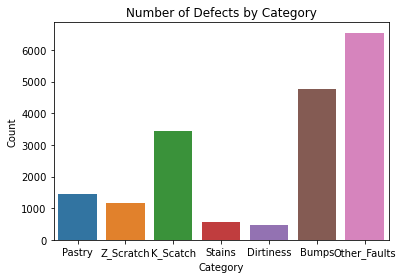

In [26]:
sns.barplot(x=target_columns,y=target_counts)
plt.title('Number of Defects by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [27]:
df_train.drop('Total_defects',axis=1,inplace=True)

In [28]:
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [29]:
target_cols=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
               'Dirtiness', 'Bumps', 'Other_Faults']

In [30]:
df_train['X_Range'] = df_train['X_Maximum'] - df_train['X_Minimum']
df_train['Y_Range'] = df_train['Y_Maximum'] - df_train['Y_Minimum']
df_train['Luminosity_Range'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_train['Total_Perimeter'] = df_train['X_Perimeter'] + df_train['Y_Perimeter']
df_train['Area_Perimeter_Ratio'] = df_train['Pixels_Areas'] / df_train['Total_Perimeter']


In [31]:
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_Range,Y_Range,Luminosity_Range,Total_Perimeter,Area_Perimeter_Ratio
0,0,584,590,909972,909977,16,8,5,2274,113,...,0,1,0,0,0,6,5,27,13,1.230769
1,1,808,816,728350,728372,433,20,54,44478,70,...,0,0,0,0,1,8,22,41,74,5.851351
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,1,0,0,0,0,153,68,112,1125,10.122667
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,1,0,0,0,0,8,27,20,45,4.666667
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0,0,0,0,1,20,45,29,139,3.748201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0,1,0,0,0,8,9,18,8,2.125000
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0,0,0,0,1,12,12,29,43,5.372093
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0,0,0,0,0,25,74,53,212,3.679245
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0,0,0,0,1,9,12,44,39,3.230769


In [32]:
X = df_train.drop(target_columns,axis=1)
y = df_train[target_columns]

In [33]:
X

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Luminosity_Range,Total_Perimeter,Area_Perimeter_Ratio
0,0,584,590,909972,909977,16,8,5,2274,113,...,0.9031,0.6990,-0.5000,-0.0104,0.1417,6,5,27,13,1.230769
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7782,1.7324,0.7419,-0.2997,0.9491,8,22,41,74,5.851351
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,2.1790,2.2095,-0.0105,-0.0944,1.0000,153,68,112,1125,10.122667
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.7782,1.4314,0.6667,-0.0402,0.4025,8,27,20,45,4.666667
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,1.4150,1.8808,0.9158,-0.2455,0.9998,20,45,29,139,3.748201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.7782,0.6021,-0.1429,0.0044,0.2901,8,9,18,8,2.125000
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,1.0414,1.4150,0.7222,-0.0989,0.5378,12,12,29,43,5.372093
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,1.4314,1.8692,0.7719,-0.4283,0.9997,25,74,53,212,3.679245
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,1.0414,1.4150,0.9610,-0.1162,0.3509,9,12,44,39,3.230769


In [34]:
y

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,0,0,0,0,0,0,1
19216,1,0,0,0,0,0,0
19217,0,0,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
print(f'Shape of Training sets:{X_train.shape},{y_train.shape}')
print(f'Shape of Validation sets:{X_val.shape},{y_val.shape}')

Shape of Training sets:(15375, 33),(15375, 7)
Shape of Validation sets:(3844, 33),(3844, 7)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

attributes = list(X.columns)
num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([
    ('num',num_pipeline,attributes)
])

In [38]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

lgbm_classifiers = []

for t_col in target_columns:
    
    print(f'Column:{t_col}')
    lgbm_clf = make_pipeline(preprocessing,LGBMClassifier(random_state=42,verbose=-1))
    lgbm_clf.fit(X,y[t_col])
    lgbm_classifiers.append(lgbm_clf)
    cross_val_score_lgbm = cross_val_score(lgbm_clf,X,y[t_col],cv=4,scoring='roc_auc').mean()
    print('CV Score of LGBM:',cross_val_score_lgbm)

Column:Pastry
CV Score of LGBM: 0.8554421377953967
Column:Z_Scratch
CV Score of LGBM: 0.9553170346279503
Column:K_Scatch
CV Score of LGBM: 0.9838825351523153
Column:Stains
CV Score of LGBM: 0.9926674424219151
Column:Dirtiness
CV Score of LGBM: 0.8737388684739085
Column:Bumps
CV Score of LGBM: 0.8010639610545902
Column:Other_Faults
CV Score of LGBM: 0.6872893252733232


In [39]:
submission_ids = list(df_test.index)

In [40]:
df_test['X_Range'] = df_test['X_Maximum'] - df_test['X_Minimum']
df_test['Y_Range'] = df_test['Y_Maximum'] - df_test['Y_Minimum']
df_test['Luminosity_Range'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']
df_test['Total_Perimeter'] = df_test['X_Perimeter'] + df_test['Y_Perimeter']
df_test['Area_Perimeter_Ratio'] = df_test['Pixels_Areas'] / df_test['Total_Perimeter']


In [41]:
submission_df = pd.DataFrame()
submission_df['id'] = submission_ids

In [42]:
for ind, col in enumerate(target_columns):
    submission_df[col] = lgbm_classifiers[ind].predict_proba(df_test)[:,1]

In [43]:
submission_df.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0.548261,0.000393,0.001067,0.000008,0.012748,0.126930,0.379173
1,1,0.244167,0.003119,0.003838,0.000014,0.123540,0.128800,0.370181
2,2,0.001915,0.020555,0.022421,0.000042,0.004812,0.249197,0.573714
3,3,0.184879,0.000533,0.000222,0.000107,0.002776,0.282473,0.496537
4,4,0.001011,0.000405,0.000365,0.000754,0.002162,0.587405,0.385902


In [44]:
def auc_score(estimator,x,y):
    y_prob=estimator.predict_proba(x)
    return roc_auc_score(y,y_prob,multi_class="ovr")

In [71]:
best_params =  {'n_estimators': 880,
              'learning_rate': 0.01104323232513497,
              'gamma': 0.19584318371982985,
              'reg_alpha': 0.32278378258662743,
              'reg_lambda': 0.9232746535986651,
              'max_depth': 4,
              'min_child_weight': 13,
              'subsample': 0.8038891023587624,
              'colsample_bytree': 0.5216279629980719,
              'random_state': 629
             }

In [72]:
xgb=XGBClassifier(**best_params)
mean_score=cross_val_score(xgb,X_train,y_train,scoring=auc_score,cv=5)
print(f"AUC score {mean_score.mean()}")

AUC score 0.8860707439091389


In [73]:
xgb.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5216279629980719, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.19584318371982984,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01104323232513497,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=880, n_jobs=None,
              num_parallel_tree=None, random_state=629, ...)

In [74]:
y_pred=xgb.predict_proba(df_test)

In [75]:
y_pred.shape

(12814, 7)

In [76]:
submission=pd.read_csv("sample_submission.csv")

In [77]:
submission[target_cols]=y_pred
submission.to_csv("submission.csv",index=False)

In [78]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.569896,0.001426,0.003816,0.000209,0.015951,0.163249,0.411529
1,19220,0.270481,0.015633,0.009059,0.000380,0.193611,0.176202,0.380388
2,19221,0.002448,0.029871,0.039584,0.000984,0.009253,0.287171,0.500590
3,19222,0.191963,0.001806,0.000849,0.001399,0.016046,0.353448,0.432840
4,19223,0.002424,0.001836,0.001409,0.004130,0.008911,0.577458,0.425935
...,...,...,...,...,...,...,...,...
12809,32028,0.063558,0.108776,0.004880,0.000273,0.020755,0.169634,0.403265
12810,32029,0.181188,0.003903,0.024589,0.008537,0.121200,0.171092,0.475740
12811,32030,0.001101,0.000669,0.927695,0.000351,0.001069,0.001373,0.068401
12812,32031,0.428051,0.010792,0.021999,0.000301,0.059969,0.164177,0.392899
